<a href="https://colab.research.google.com/github/Tomoki-Ishikura/lecture_infosys/blob/main/BasicOptim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

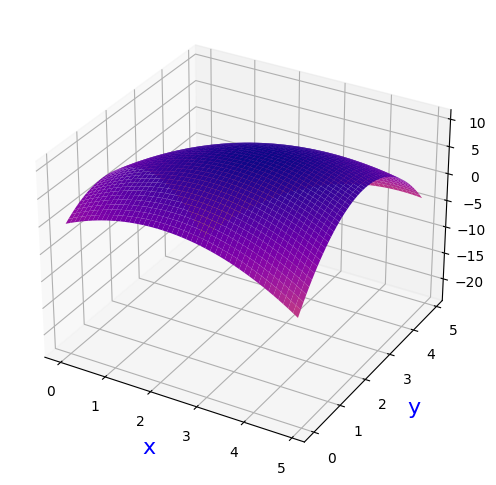

In [ ]:
import os
import numpy as np # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ作成ライブラリ

# from scipy.optimize import root


# Figureを作成
fig = plt.figure(figsize = (10, 6))

# FigureにAxes(軸)を追加
ax = fig.add_subplot(1,1,1, projection='3d')
# 軸ラベルを設定
ax.set_xlabel("x", size = 16, color = "blue")
ax.set_ylabel("y", size = 16, color = "blue")
ax.set_zlabel("F", size = 16, color = "blue")


x=np.arange(0,5,0.1)
# 0から4.9まで0.1間隔の50個の要素を持つアレイ（ベクトル）を作成
y=x # 同じサイズのアレイ（ベクトル）をコピーにより作成

# 格子点の作成
X, Y = np.meshgrid(x, y)

# 関数の計算式
F0 = -(X**2) -2* (Y**2) +4*X +5*Y + X*Y

# 曲面を描画(カラーマップは'plasma_r','hsv'など)
ax.plot_surface(X, Y, F0, cmap = "plasma_r")



<a list of 10 text.Text objects>

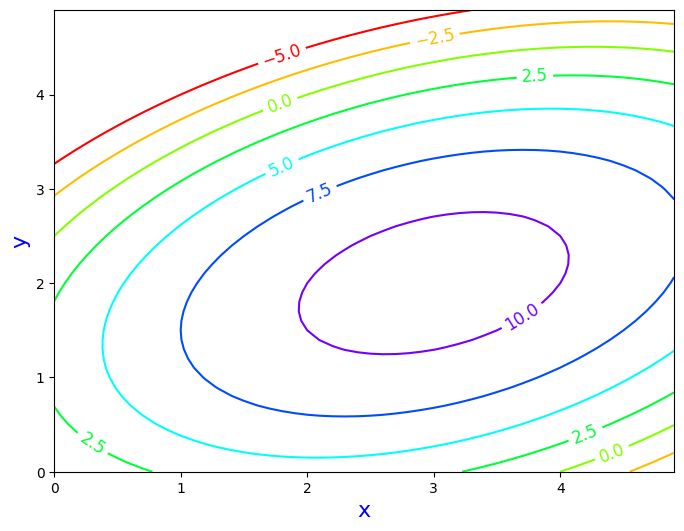

In [ ]:
"""
このブロックは，最適点を探索したい関数の3D形状をプロットして，わかりやすくするためのものです．
実行しなくても計算には影響がありません．
"""

# Figure2を作成
fig2 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax2 = fig2.add_subplot()
# 軸ラベルを設定
ax2.set_xlabel("x", size = 16, color = "blue")
ax2.set_ylabel("y", size = 16, color = "blue")

# 等高線を描く高度
hight = [-5, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15]

# 等高線をプロット(カラーマップはhsv)
cont = ax2.contour(X, Y, F0, cmap = "hsv", levels = hight)

# 等高線ラベルを設定
ax2.clabel(cont, fontsize = 12)


現在の勾配ベクトルのノルムは:8.200609733428363
現在の勾配ベクトルのノルムは:5.254759747124506
現在の勾配ベクトルのノルムは:3.648181053621105
現在の勾配ベクトルのノルムは:2.7341924310479686
現在の勾配ベクトルのノルムは:2.164559218986628
現在の勾配ベクトルのノルムは:1.7685069698265254
現在の勾配ベクトルのノルムは:1.4680540864253775
現在の勾配ベクトルのノルムは:1.2277605153123559
現在の勾配ベクトルのノルムは:1.0302737111812594
現在の勾配ベクトルのノルムは:0.8658576371461717
現在の勾配ベクトルのノルムは:0.7281663661851029
現在の勾配ベクトルのノルムは:0.612552010004131
現在の勾配ベクトルのノルムは:0.5153614111695173
現在の勾配ベクトルのノルムは:0.43361646825899314
現在の勾配ベクトルのノルムは:0.3648468777769935
現在の勾配ベクトルのノルムは:0.3069872555183901
現在の勾配ベクトルのノルムは:0.25830463198078685
現在の勾配ベクトルのノルムは:0.21734266261385907
現在の勾配ベクトルのノルムは:0.1828766203173891
現在の勾配ベクトルのノルムは:0.15387624285747892
現在の勾配ベクトルのノルムは:0.12947473803373155
現在の勾配ベクトルのノルムは:0.10894280265750304
おめでとう！収束しました!繰り返し計算の22回目です


<a list of 10 text.Text objects>

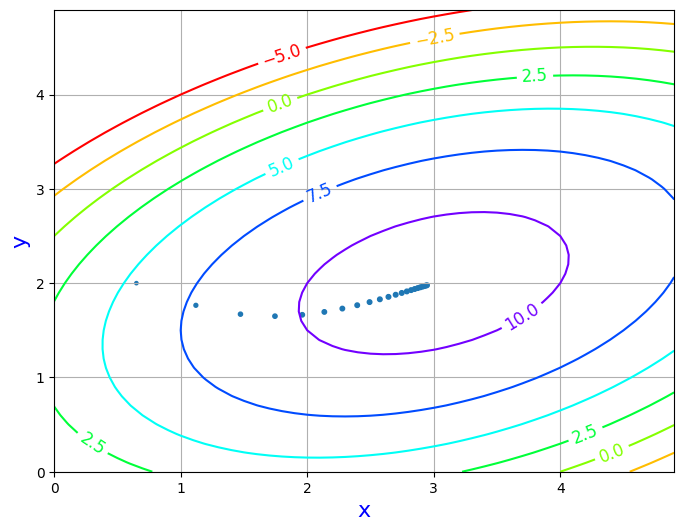

In [ ]:
"""
準備はここまで
初期点として，原点の(x,y)を選んで，簡単なアルゴリズムにより最適点（関数の最大値を返す座標）を探す．
ステップ幅0.1の最急降下法
"""
N_Iteration=100 # 繰り返し計算の上限値
Record=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成

# Step 0
# 初期点(x,y)
x=0
y=2.5

# ステップ幅 alphaの値を設定
alpha=0.1

for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    F = -(x**2) -2* (y**2) +4*x +5*y + x*y

    Record[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 降下方向（解の更新方向）の計算
    # 勾配ベクトルの計算(偏微分)
    dx= -2*x +4 + y
    dy=  -4*y +5 + x
    Grad=np.array((dx, dy))

    LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム
    Manual=np.sqrt(dx**2+dy**2) # sqrtは平方根の関数です
    # print(LengVec)
    # print(Manual)
    if Manual<0.1:
    # if LengVec<0.1:
        print('おめでとう！収束しました!繰り返し計算の'+str(I)+'回目です')
        break
    else:
        # print('現在の勾配ベクトルのノルムは:'+str(LengVec))
        print('現在の勾配ベクトルのノルムは:'+str(Manual))

    # 最急降下法のステップ幅 0.1
    # Step 3 次の座標を決める
    x=x+ 0.1*dx
    y=y+ 0.1*dy
# ここまでで，繰り返し計算は終了

# ここから結果のまとめ
x_result=Record[:,0]
y_result=Record[:,1]
F_result=Record[:,2]

# グラフを表示する準備
fig3 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax3 = fig3.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax3.set_xlabel("x", size = 16, color = "blue")
ax3.set_ylabel("y", size = 16, color = "blue")

ax3.grid() # 罫線

Scat = ax3.scatter(x_result,y_result,F_result) # 繰り返し計算の軌跡
Cont2 = ax3.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線
# 等高線ラベルを設定
ax3.clabel(Cont2, fontsize = 12)



<a list of 10 text.Text objects>

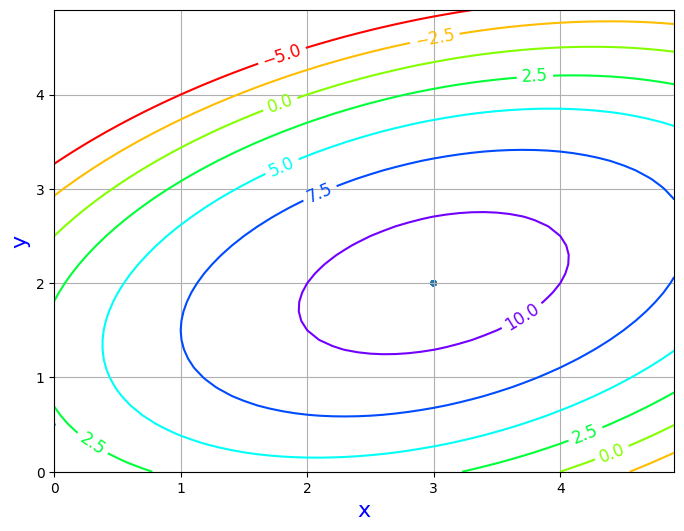

In [ ]:
"""
初期点として，原点の(0,0)を選んで，ニュートン法
"""

RecordNewton=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成


# Step 0, 初期解の座標(x,y)を与える．
x=0
y=0

# 次のステップの準備
for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    F = -(x**2) -2* (y**2) +4*x +5*y + x*y

    RecordNewton[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 降下方向（解の更新方向）の計算
    # Step 2-1勾配ベクトルの計算(偏微分)
    dx= -2*x +4 + y
    dy=  -4*y +5 + x
    Grad=np.array((dx, dy))

    # Step 2-2 二階微分の計算(行列)
    dxx = -2
    dyy = -4
    dxy = 1
    D2=[[dxx, dxy],[dxy,dyy]]

    # Step 2-3 Hesse行列の計算，上の逆行列
    H=np.linalg.inv(D2)

    # Step 3 次の座標を決める
    Step=np.dot(H,Grad)
    x=x - Step[0]
    y=y - Step[1]
# ここまでで，繰り返し計算は終了

# ここから結果のまとめ
x_result2=RecordNewton[:,0]
y_result2=RecordNewton[:,1]
F_result2=RecordNewton[:,2]

# グラフを表示する準備
fig4 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax4 = fig4.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax4.set_xlabel("x", size = 16, color = "blue")
ax4.set_ylabel("y", size = 16, color = "blue")

ax4.grid() # 罫線

Scat2 = ax4.scatter(x_result2,y_result2,F_result2) # 繰り返し計算の軌跡
Cont3 = ax4.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線
# 等高線ラベルを設定
ax4.clabel(Cont3, fontsize = 12)
